# Large Dataset Classification - COVID-19 Public Use Data

## By Yang Chen and Matthew Zhang

### Introduction

This dataset is a collection of 100,325,980 observations taken by the CDC during the (ongoing) COVID-19 Pandemic. The dataset encompasses 12 variables that describe the charactersitics of the majority of COVID-19 cases (the data was last updated a week ago on 8 September). The dataset includes important dates regarding the patient (when the case was reported to the CDC, when it was transmitted), the current status of the patient, sex, age group, among other things. Essentially, the data allows us to see trends about COVID-19 patients and determine certain risk factors.

Note that the data is not fully accurate since most sources suggest a total of around 108 million cases. The 8 million or so cases not covered likely were not reported to the CDC.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Below, we will be chunking the data to make it easier to load our data.

In [2]:
chunk_size = 50000
chunks = []
for chunk in pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data.csv', chunksize=chunk_size):

    chunks.append(chunk)


df = pd.concat(chunks, axis=0)

In the below code blocks, we will be cleaning the data to make our classification easier. We will be renaming columns and dropping those we don't need.

In [3]:
df.head(50)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021/11/19,2021/11/19,NaN,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Missing,Missing,Yes,Missing
1,2022/07/28,2022/07/29,NaN,2022/07/28,Probable Case,Female,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
2,2021/10/31,2021/11/03,NaN,2021/10/31,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",No,Missing,No,Missing
3,2023/04/13,2023/04/18,NaN,2023/04/13,Probable Case,Female,80+ Years,"White, Non-Hispanic",No,Missing,Missing,Missing
4,2022/10/22,2022/12/06,2022/10/22,NaN,Probable Case,Female,80+ Years,"White, Non-Hispanic",Unknown,Unknown,Missing,Unknown
5,2021/08/20,2021/08/20,2021/08/20,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",No,Unknown,No,No
6,2022/09/14,2022/09/19,2022/09/14,NaN,Probable Case,Female,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
7,2020/11/28,2020/12/04,2020/11/28,2020/11/28,Probable Case,Female,80+ Years,"White, Non-Hispanic",No,Missing,Missing,Missing
8,2022/10/27,2022/10/31,2022/10/27,NaN,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
9,2021/01/19,2021/01/20,NaN,2021/01/19,Laboratory-confirmed case,Female,80+ Years,"White, Non-Hispanic",No,Missing,Unknown,Missing


In [4]:
# Drop unnecessary columns
df = df.drop(columns=[
    'pos_spec_dt', 'onset_dt', 'current_status', 'hosp_yn', 'medcond_yn'
])

# Rename columns
df = df.rename(columns={
    'cdc_report_dt': 'Report_Date',
    'sex': 'Gender',
    'age_group': 'Age_Group',
    'race_ethnicity_combined': 'Race_Ethnicity',
    'icu_yn': 'ICU_Status',
    'death_yn': 'Death_Status'
})


In [5]:
# Convert 'Report_Date' column to datetime format
df['Report_Date'] = pd.to_datetime(df['Report_Date'], errors='coerce')

In [6]:
# Since the dataset is large enough, we drop rows where any of the columns contain 'Missing' or 'Unknown'
df = df[~((df == 'Missing') | (df == 'Unknown')).any(axis=1)]

In the below code, we will create our Random Forest Classifier and model to train by selecting a specific set of variables that we want to classify.

In [8]:
X = df[[ 'Gender','Age_Group', 'Race_Ethnicity', 'ICU_Status']] 
y = df['Death_Status']

# Encode
for col in [ 'Gender', 'Age_Group', 'Race_Ethnicity', 'ICU_Status', 'Death_Status']:
    df[col] = df[col].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#  Create model
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
df

,cdc_case_earliest_dt,Report_Date,Gender,Age_Group,Race_Ethnicity,ICU_Status,Death_Status
47,2022/02/01,2022-02-02,0,9,6,0,0
66,2021/09/05,2021-09-10,0,9,6,0,0
91,2021/11/11,2021-11-13,0,9,6,0,0
101,2022/08/31,2022-09-01,0,9,6,0,1
252,2020/10/30,2020-11-07,0,9,6,0,1
...,...,...,...,...,...,...,...
99566140,2022/06/28,2022-07-07,0,9,6,1,0
99566157,2022/07/29,2022-07-30,0,9,6,0,1
99566167,2020/12/04,2020-12-04,0,9,6,1,1
99566205,2021/02/11,2023-03-08,0,9,6,0,0


Now we will test the accuracy of our model.

In [10]:
y_pred = clf.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.47%


As we see above, the model is quite accurate in totality, suggesting that our model is good and that the variables that we have selected will classify the data well.

## Visualisations

Now we will create a set of three visualisations to plot our data alongside interpretations.

Firstly we will create a plot of the relative importance of the features in the X set of our model.

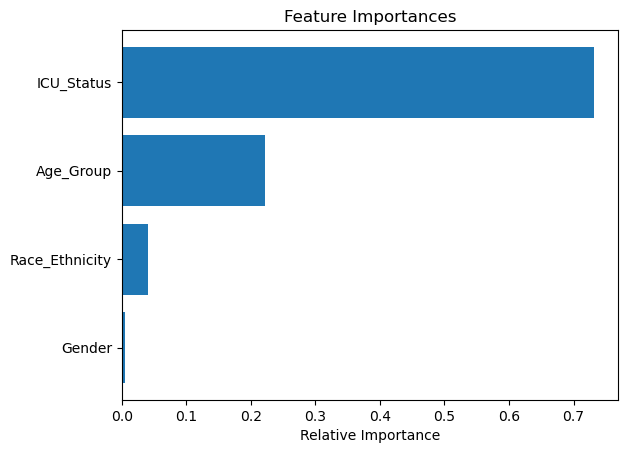

In [11]:
feature_importances = clf.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

As we see above, the most important feature by a longshot was ICU Status. This is likely because the ICU stiuation of an individual is a key indicator of whether or not a patient survived their bout with COVID or not. According to NIH data found at this link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7276026/#:~:text=Early%20reports%20of%20smaller%20cohorts,receiving%20invasive%20mechanical%20ventilation%20died, it is estimated that 50-67% of patients admitted to the ICU died. 

Age group is next in importance due to COVID being more deadly and having more adverse effects towards those who are older and liklely has an underlying condition.

Race/Ethnicity is third and holds a surprisingly lower amount of significance considering the fact that COVID was considered (by per capita data) to be worse in the black community. It is likely the importance was overshadowed by the above two since the plot is measuring relativity in importance.

Gender was obviously last since there are very few gender differences that would determine the whether or not someone could recover from the disease.

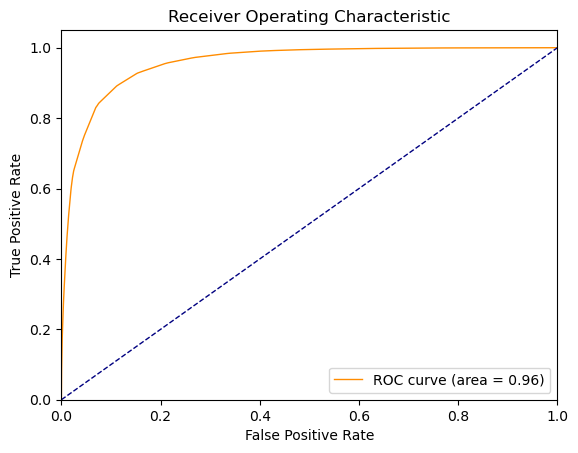

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# calculate AOC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# visaulize ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In the above plot, we have our ROC curve and a plot of the True Positive Rate against the False Positive Rate. The data further confirms the accuracy of our model and given the area under the ROC curve of 0.96.

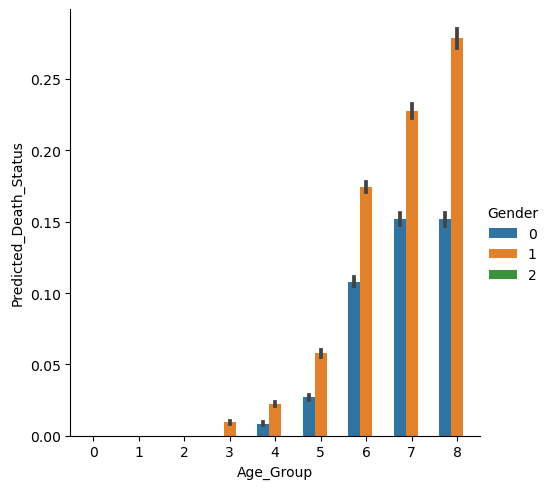

In [13]:
y_pred = clf.predict(X_test)

X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_Death_Status'] = y_pred

import seaborn as sns
sns.catplot(x="Age_Group", y="Predicted_Death_Status", hue="Gender", kind="bar", data=X_test_with_predictions)

*Note in the above plot: 0 for Gender is Female and 1 for Gender is Male.*

Our final plot is a plot of the predicted death status based on the Age Group variable that also takes into account Gender based on hue. The conclusions we can draw from the above data is fairly straightforward: people who are older are much more likely to be dead from the virus. Another thing to take into account is that the y-axis (Predicted Death Status) ishigher for men than for women of all age groups. This confirms pre-existing data suggesting that men are more likely to die of the disease than women, although the relative importance does not show this.

## Conclusions

From our Random Forest Classification and our plots, we can determine that ICU Status is the number one factor of the variables that we tested to determine the status of a COVID patient. Age Group was next, which tracks well with the exiting data about older age groups being much more vulnerable to the virus than those in younger age groups. Race and Ethnicity was third in importance and Gender was last, although as our third plot showed, men were much more likely to die of COVID. 

The model that we created likely could encompass more data and more of the existing variables, however it gives a good introductory starting point to predicting and classifying COVID-19 data based on the Random Forest Classifier. 